In [1]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()


Saving car data.csv to car data.csv


In [24]:
# Loading required packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Loading the dataset
car = pd.read_csv('car data.csv')


In [25]:
car.head(4)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


In [26]:
# 1. Data Summary

print(car.describe())
print(car.dtypes)
print(car.isnull().sum())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
D

As we can see there are no null values in the data set

<ipython-input-27-1020ea6d282b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car["Selling_Price"])


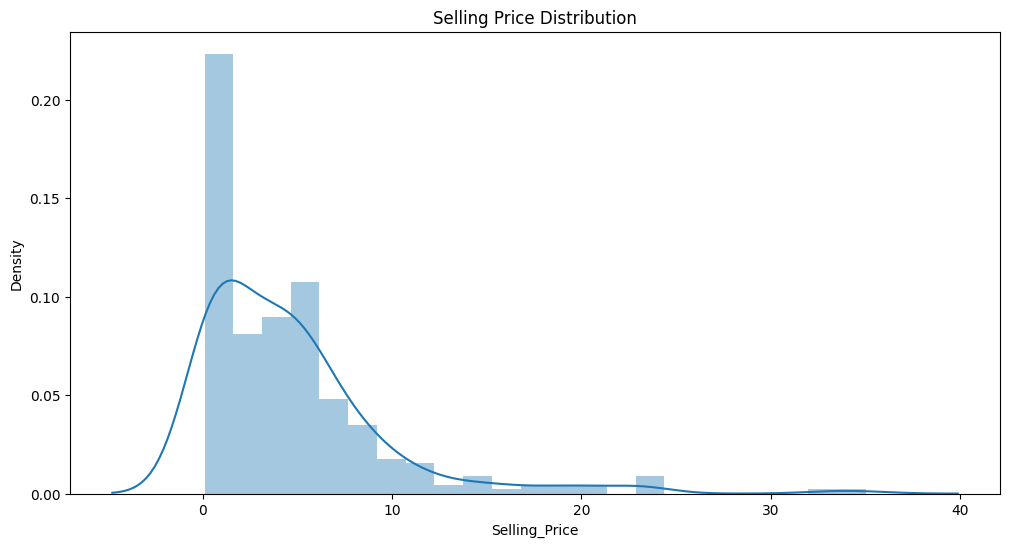

In [27]:
# 2. Visualizations

plt.figure(figsize=(12, 6))
sns.distplot(car["Selling_Price"])
plt.title("Selling Price Distribution")
plt.show()

Based on the Distribution plot it is right skew

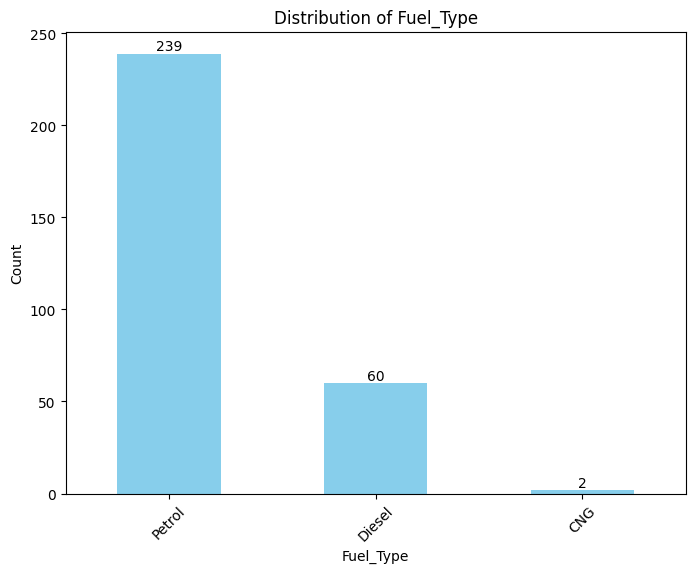

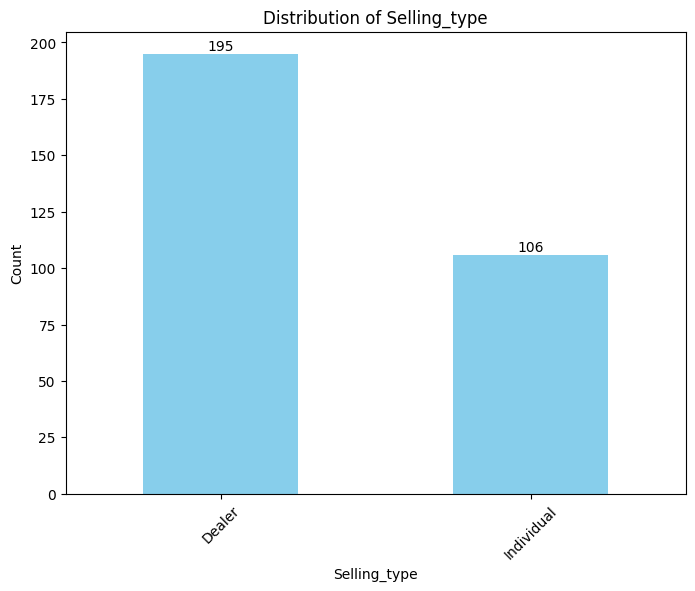

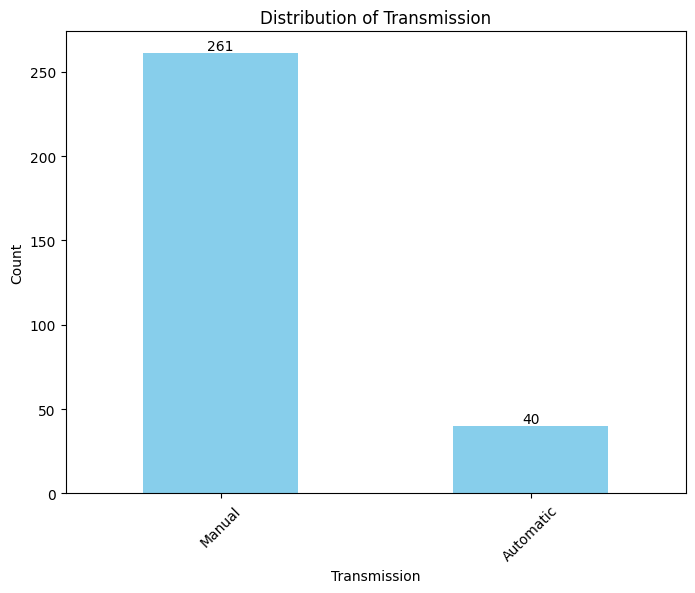

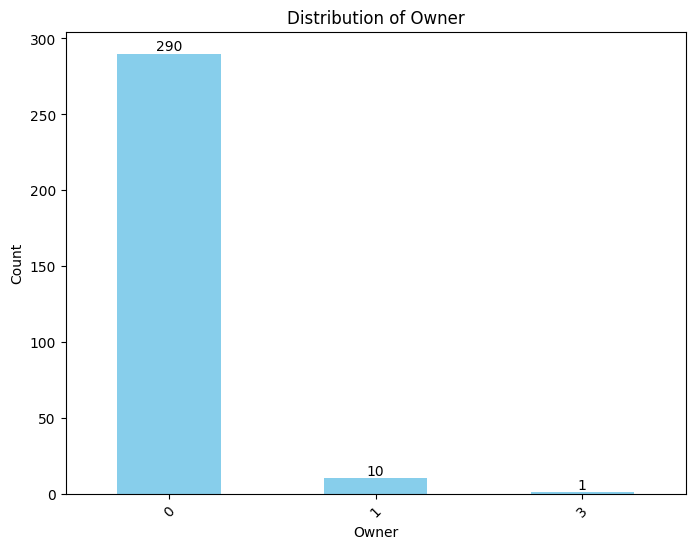

In [28]:
# List of categorical columns
categorical_columns = ['Fuel_Type','Selling_type', 'Transmission', 'Owner']

# For Loop through each categorical column and create barplots
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    car[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')


    for index, value in enumerate(car[column].value_counts()):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.show()

Based on the barplots results, where "Petrol" in the 'Fuel_Type', "Dealer" in the 'Selling_type', "Manual" in the 'Transmission', and "0" in the 'Owner' columns have high count

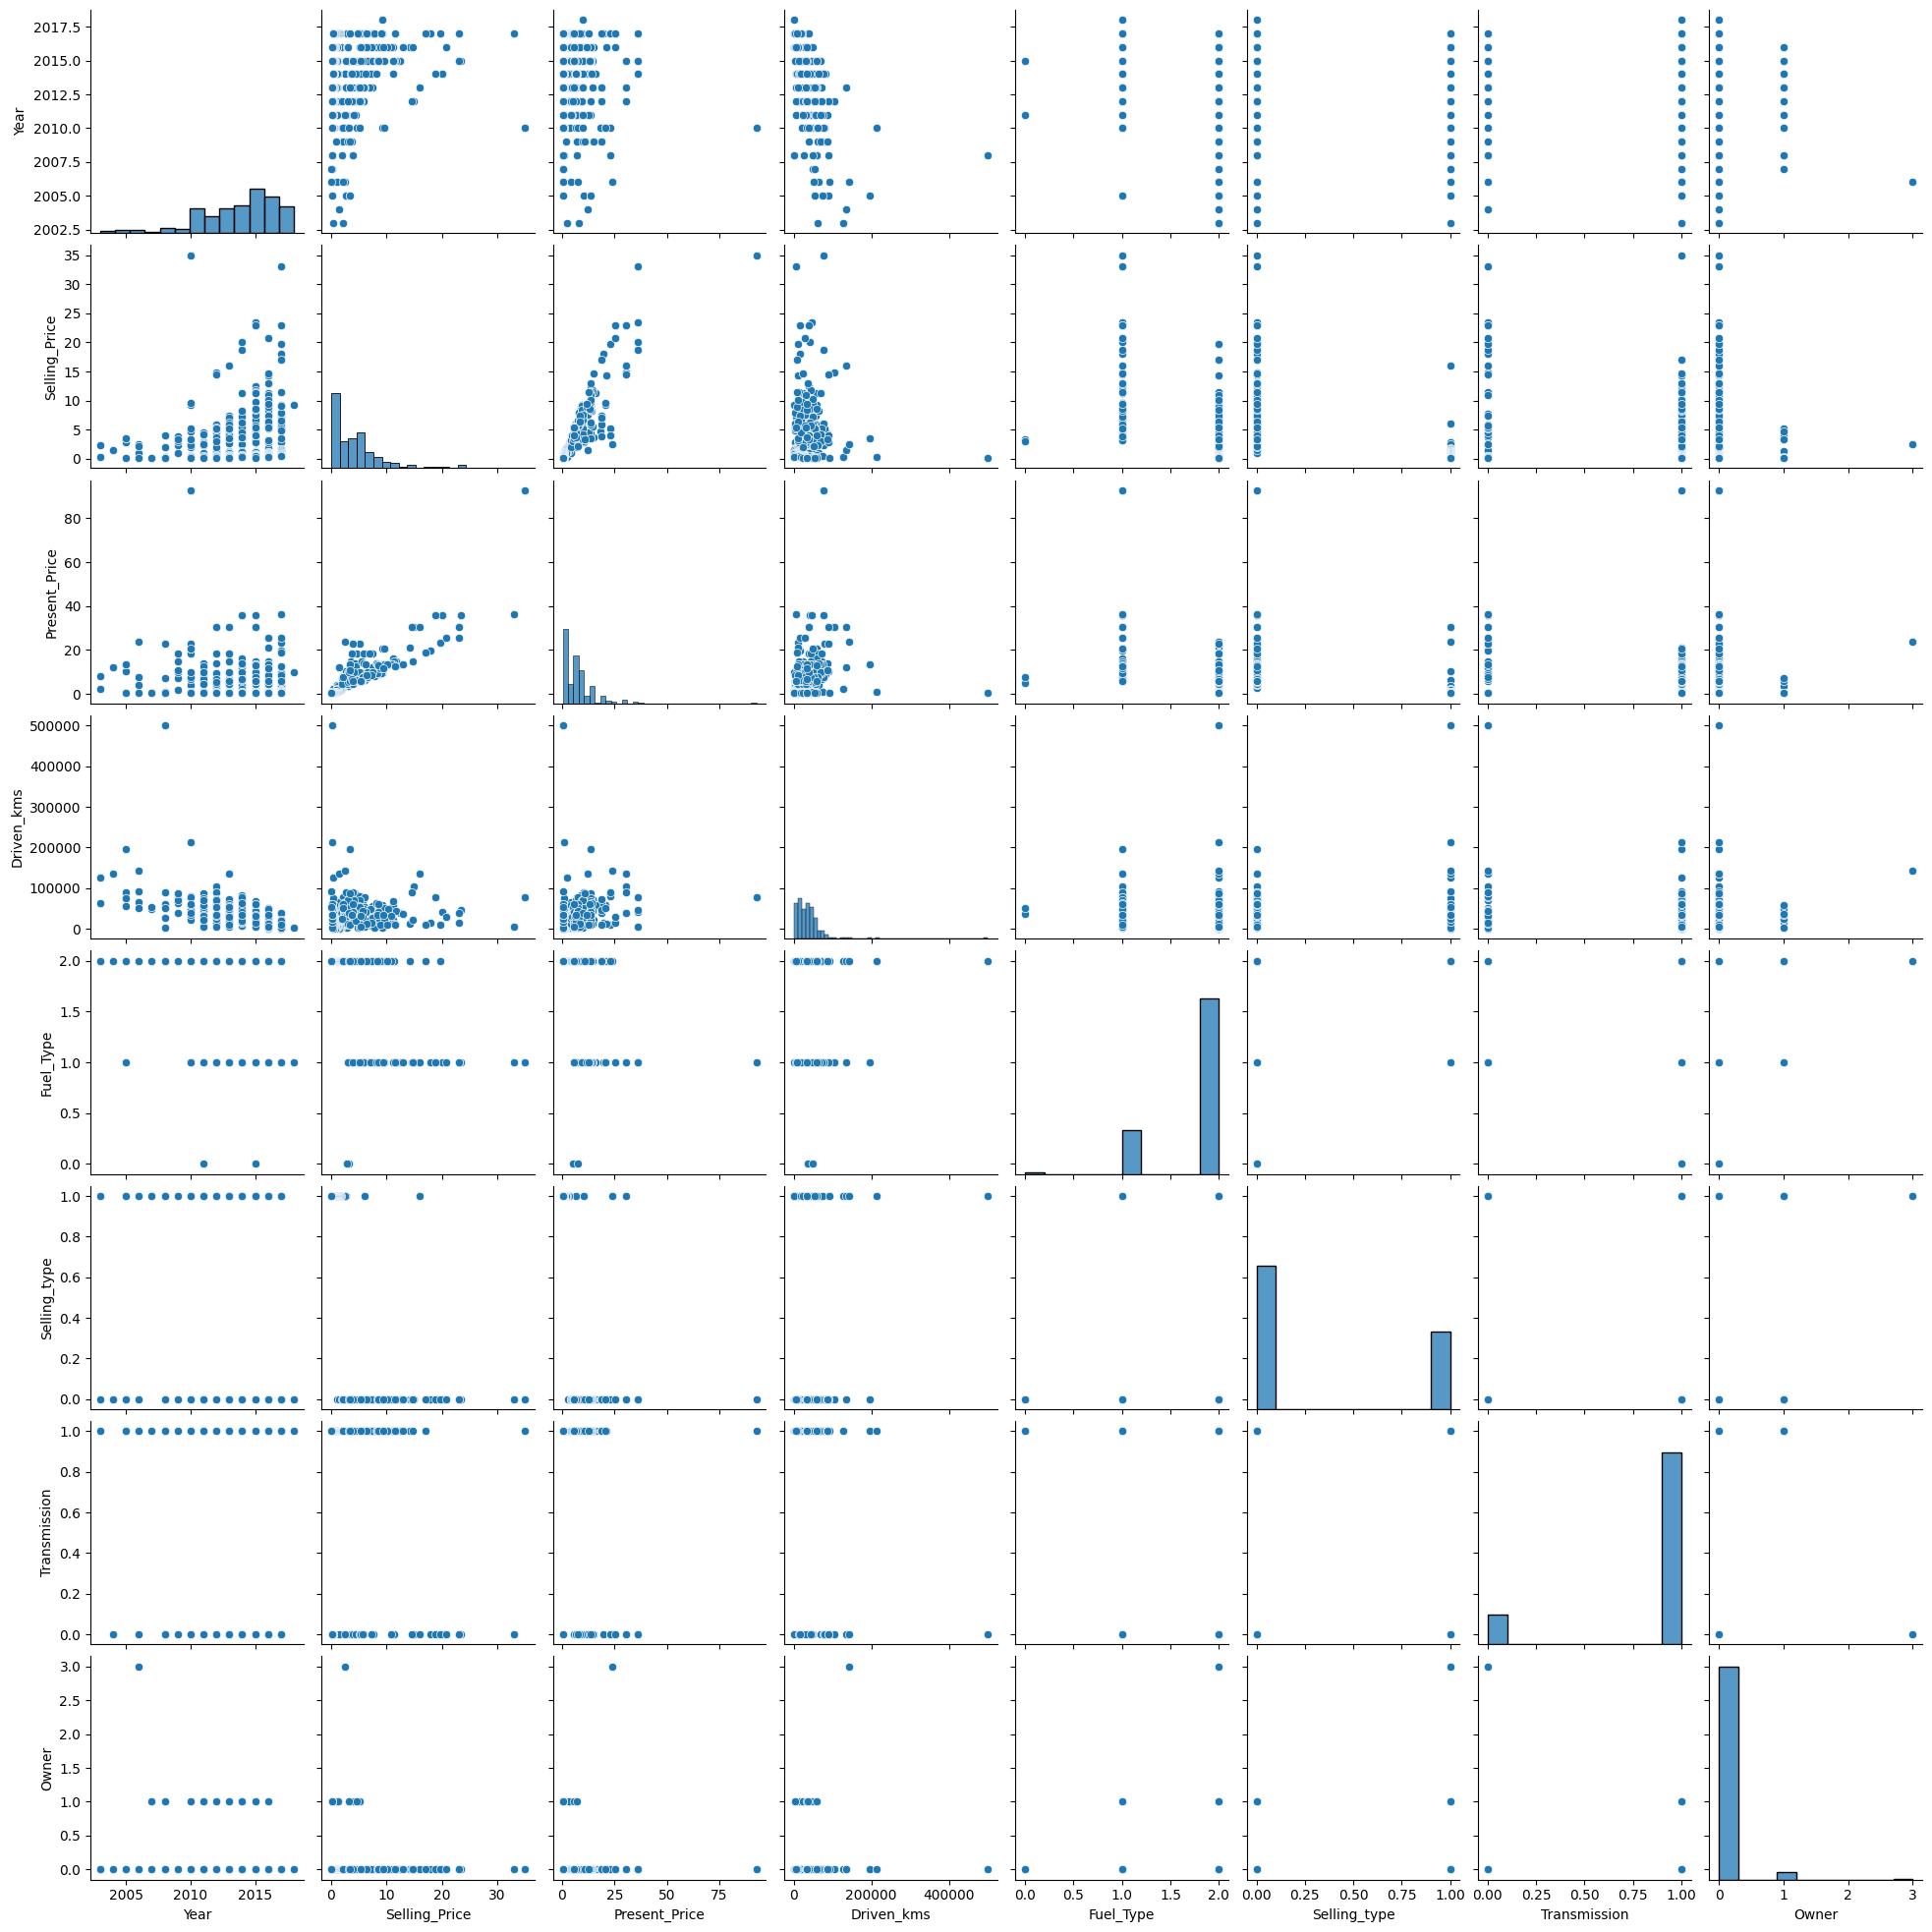

In [30]:
sns.pairplot(car)

In [ ]:
LE = LabelEncoder()

# Label encoding the 'Fuel_Type', 'Selling_type', and 'Transmission' columns

car['Fuel_Type'] = LE.fit_transform(car['Fuel_Type'])
car['Selling_type'] = LE.fit_transform(car['Selling_type'])
car['Transmission'] = LE.fit_transform(car['Transmission'])
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [31]:
# Preprocessing

X = car.drop(["Car_Name", "Selling_Price"], axis=1)
y = car["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# Defined a function to evaluate and print model metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Hyperparameter Tuning for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_params = rf_random.best_params_

# Training Random Forest with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    random_state=42
)

best_rf_model.fit(X_train, y_train)
best_rf_predictions = best_rf_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [35]:
# Hyperparameter Tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'gamma': [0, 1]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

# Best parameters for XGBoost
best_xgb_params = xgb_random.best_params_

# Training XGBoost with the best parameters
best_xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=best_xgb_params['n_estimators'],
    learning_rate=best_xgb_params['learning_rate'],
    max_depth=best_xgb_params['max_depth'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    gamma=best_xgb_params['gamma'],
    random_state=42
)

best_xgb_model.fit(X_train, y_train)
best_xgb_predictions = best_xgb_model.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [36]:
# Hyperparameter Tuning for Support Vector Regressor
svr_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'epsilon': [0.01, 0.1]
}

svr_grid = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

svr_grid.fit(X_train, y_train)

# Best parameters for SVR
best_svr_params = svr_grid.best_params_

# Training SVR with the best parameters
best_svr_model = SVR(
    C=best_svr_params['C'],
    kernel=best_svr_params['kernel'],
    epsilon=best_svr_params['epsilon']
)

best_svr_model.fit(X_train, y_train)
best_svr_predictions = best_svr_model.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [38]:
# Defined the models dictionary with the best-tuned models
models = {
    "Random Forest": best_rf_predictions,
    "XGBoost": best_xgb_predictions,
    "SVR": best_svr_predictions
}

# Models with Best Parameters
results = []

for model_name, predictions in models.items():
    metrics = evaluate_model(y_test, predictions, model_name)
    results.append(metrics)

# Results
for result in results:
    print(f"{result['Model']} Results:")
    print(f"MSE: {result['MSE']:.2f}")
    print(f"RMSE: {result['RMSE']:.2f}")
    print(f"MAE: {result['MAE']:.2f}")
    print(f"R2: {result['R2']:.2f}")
    print()


Random Forest Results:
MSE: 0.87
RMSE: 0.93
MAE: 0.62
R2: 0.96

XGBoost Results:
MSE: 0.58
RMSE: 0.76
MAE: 0.49
R2: 0.97

SVR Results:
MSE: 4.25
RMSE: 2.06
MAE: 1.28
R2: 0.82



Based on these metrics results of the Best Parameters, XGBoost has the lowest RMSE (0.76) and the highest R2 (0.97) among the models, indicating that it performs the best in terms of predictive accuracy. Therefore, XGBoost is the best model among all.

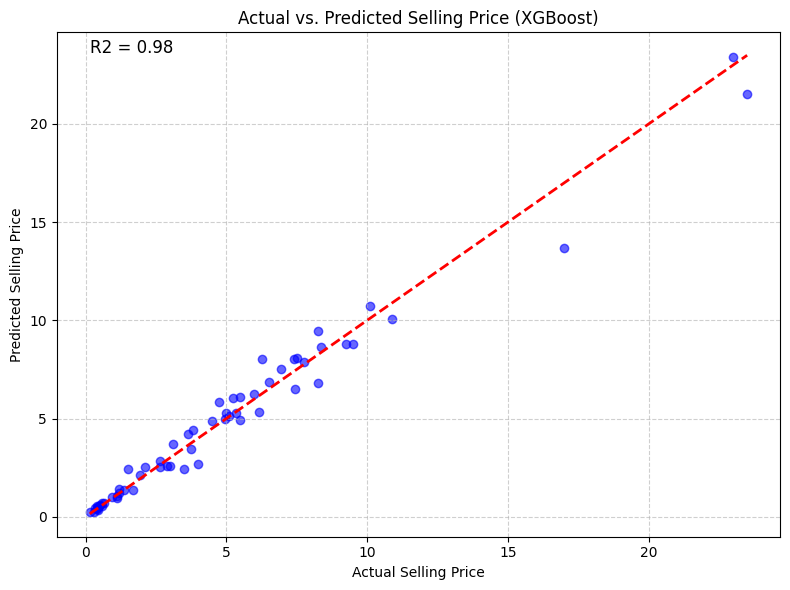

In [45]:

# Scatter plot for actual vs predicted values using XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_xgb_predictions, color='blue', alpha=0.6)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price (XGBoost)')
plt.grid(True, linestyle='--', alpha=0.6)

# predicted line in red color and R2 points in blue color
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
r2 = np.corrcoef(y_test, best_xgb_predictions)[0, 1] ** 2
plt.text(min(y_test), max(best_xgb_predictions), f'R2 = {r2:.2f}', fontsize=12, ha='left', va='bottom')

plt.tight_layout()
plt.show()
